In [4]:
from banners_mk2 import *

A = Analyzer('the_next_day', 25, '../calibrate', "rtk-co-locate.bag", "rtk-co-locate-click.csv")
# A.verifyFlight() # generates images of targets as a sanity check
A.doTheRoar() # actually will generate a report

l2 (pix) mean, median, mode 819.3694284641242 732.6388429828614 622.9873285011232
l2 (cm) mean, median, mode 247.04917808213176 220.89892263765958 187.8377470712826
l1 (pix) mean, median, mode -31.227936370780096 -64.98001643659961 140.4826527083933
l1 (cm) mean, median, mode -9.415577083542756 -19.59221212648433 42.357113507958665


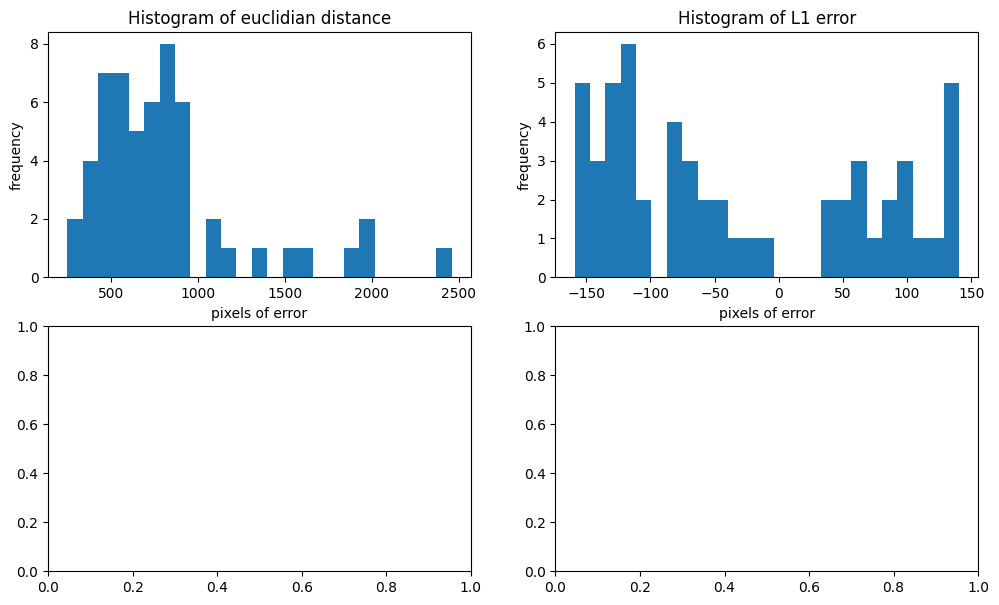

average error


In [5]:
import numpy as np
import statistics as st
def mmm(data):
    # print(data)
    # 2 norm
    norm2 = data['euclidian'].to_numpy()
    l2_mean = np.mean(norm2)
    l2_median = np.median(norm2)
    l2_mode = st.mode(norm2)
    print('l2 (pix) mean, median, mode', l2_mean, l2_median, l2_mode)

    norm2 = norm2 / np.sqrt(11)
    l2_mean = np.mean(norm2)
    l2_median = np.median(norm2)
    l2_mode = st.mode(norm2)
    print('l2 (cm) mean, median, mode', l2_mean, l2_median, l2_mode)

    norm1 = data['L1'].to_numpy()
    l1_mean = np.mean(norm1)
    l1_median = np.median(norm1)
    l1_mode = st.mode(norm1)
    print('l1 (pix) mean, median, mode', l1_mean, l1_median, l1_mode)

    norm1 = norm1 / np.sqrt(11)
    l1_mean = np.mean(norm1)
    l1_median = np.median(norm1)
    l1_mode = st.mode(norm1)
    print('l1 (cm) mean, median, mode', l1_mean, l1_median, l1_mode)

A.regreaphData(mmm)

In [13]:
# a little math to calculate dpi so we can do pixels to cm

# use K to get top left and bottom right corners

alt = 10
tl = np.array([0, 0, 1]).T
br = np.array([1920, 1080, 1]).T

tl = np.linalg.inv(rgb_K) @ tl
br = np.linalg.inv(rgb_K) @ br
print(tl, br)

tl /= tl[2]
br /= br[2]

tl *= 10
br *= 10

print(-tl, br)

[-0.29598225 -0.14738622  1.        ] [0.28081475 0.17806591 1.        ]
[  2.95982251   1.47386221 -10.        ] [ 2.80814748  1.78065911 10.        ]


In [3]:
sz = br - tl
print(sz)
sqm = sz[0] * sz[1] # square meters seen at 10m agl
print(sqm)
ppm = 1920*1080 / sqm # pixels per square meter
print(ppm)
ppc = ppm / (100**2)
print(np.sqrt(ppc))

NameError: name 'br' is not defined

In [2]:
A.verifyFlight() # generates images of targets as a sanity check


('../calibrate/stacks/rgb/img_1678168006.636201301.png',)
('../calibrate/stacks/rgb/img_1678168006.878902088.png',)
('../calibrate/stacks/rgb/img_1678168007.73929575.png',)
('../calibrate/stacks/rgb/img_1678168007.286237989.png',)
('../calibrate/stacks/rgb/img_1678168007.489479009.png',)


[('flight3_15/stacks/rgb/img_1678930994.609654092.png', array([311.64476512]), array([-10.7145105]), array([-1]), array([-1])), ('flight3_15/stacks/rgb/img_1678930994.833473783.png', array([370.48766]), array([-4.20745809]), array([-1]), array([-1])), ('flight3_15/stacks/rgb/img_1678930995.43244396.png', array([497.62310054]), array([11.31997918]), array([-1]), array([-1])), ('flight3_15/stacks/rgb/img_1678930995.284082943.png', array([550.53752887]), array([-0.27987042]), array([-1]), array([-1])), ('flight3_15/stacks/rgb/img_1678930995.480723604.png', array([607.76863444]), array([-50.18488794]), array([-1]), array([-1])), ('flight3_15/stacks/rgb/img_1678930995.676997138.png', array([690.06082628]), array([6.84161338]), array([-1]), array([-1])), ('flight3_15/stacks/rgb/img_1678930995.880950686.png', array([723.02042744]), array([-0.6474851]), array([-1]), array([-1])), ('flight3_15/stacks/rgb/img_1678930996.79644586.png', array([740.563597]), array([-11.48540188]), array([-1]), arra

/home/nick/hare_projects/lettuce/BANNERS/mk2/banners_mk2.py:708: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


('flight3_15/stacks/rgb/img_1678930994.833473783.png',)
('flight3_15/stacks/rgb/img_1678930995.43244396.png',)
('flight3_15/stacks/rgb/img_1678930995.284082943.png',)
('flight3_15/stacks/rgb/img_1678930995.480723604.png',)
average distance error 931.5608460594757


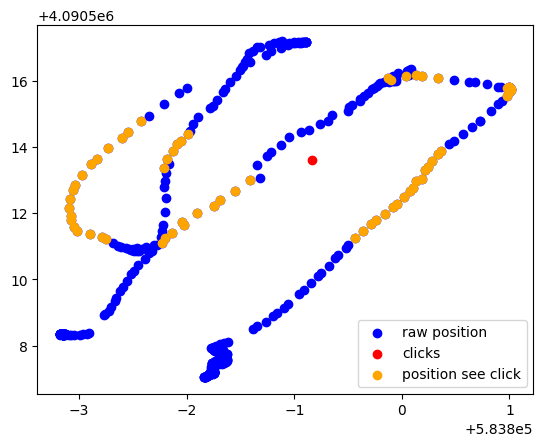

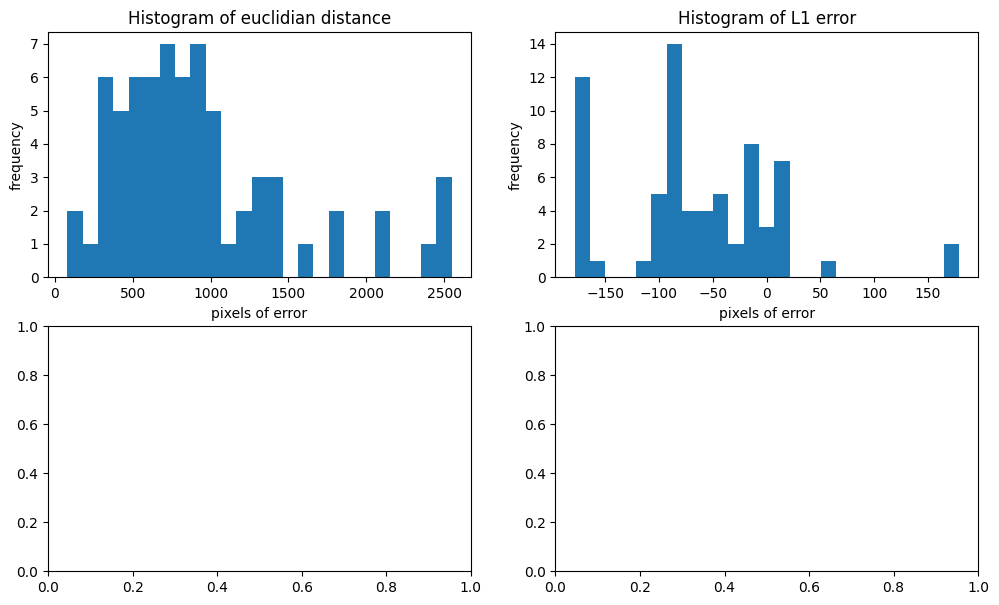

average error


In [2]:
from banners_mk2 import *

A = Analyzer('big_in_japan', 30, 'flight3_15', "_2023-03-06-16-46-44.mod.bag", "Data3.csv")
A.verifyFlight() # generates images of targets as a sanity check
A.doTheRoar() # actually will generate a report

In [2]:
import sqlite3
db_c = sqlite3.connect('drone_disease.db')
cur = db_c.cursor()
res = cur.execute(f"SELECT name FROM sqlite_master WHERE type='table';")
print(res.fetchall())

[('flight_big_in_japan',), ('clicks_big_in_japan',), ('relations_big_in_japan',)]
